# DATA analysis

## used promoters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
promoters_df = pd.read_csv('../data/raw/promoters.csv')
promoters_df


,no_by_pos,position,name,number,sequence_5_to_3,no_name,id,sys_name,length,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,1,1,pCYC1,1,NaN,1_pCYC1,1_pCYC1_1,YJR048W,NaN,2775.830,3742.74000,2459.6600
1,2,1,pENO2,2,NaN,2_pENO2,2_pENO2_2,YHR174W,NaN,2950.220,2527.27000,84.3614
2,3,1,pPCK1,3,NaN,3_pPCK1,3_pPCK1_3,YKR097W,NaN,1948.900,9.80902,4639.4100
3,4,1,pRPL15B,4,NaN,4_pRPL15B,4_pRPL15B_4,YMR121C,NaN,200.212,186.50900,258.0280
4,1,2,pCCW12,5,NaN,5_pCCW12,5_pCCW12_1,YLR110C,NaN,5496.460,6376.54000,2516.0500
5,2,2,pMLS1,6,NaN,6_pMLS1,6_pMLS1_2,YNL117W,NaN,2222.160,8.09464,5267.0000
6,3,2,pTPI1,7,NaN,7_pTPI1,7_pTPI1_3,YDR050C,NaN,2264.780,2853.86000,209.1640
7,4,2,pURE2,8,NaN,8_pURE2,8_pURE2_4,YNL229C,NaN,253.590,344.07600,222.4390


In [3]:
promoters_df = promoters_df[["name", "NIL_6h_FPKM", "NIL_12h_FPKM", "NIL_24h_FPKM"]]
promoters_df

,name,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [4]:
promoters_df.columns = ['name', 6, 12, 24]
promoters_df

,name,6,12,24
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [5]:
promoters_df = promoters_df.set_index('name')


In [6]:
df_with_prom1 = promoters_df.loc[["pCYC1","pENO2","pPCK1","pRPL15B"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


In [7]:
df_with_prom2 = promoters_df.loc[["pCCW12","pMLS1","pTPI1","pURE2"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


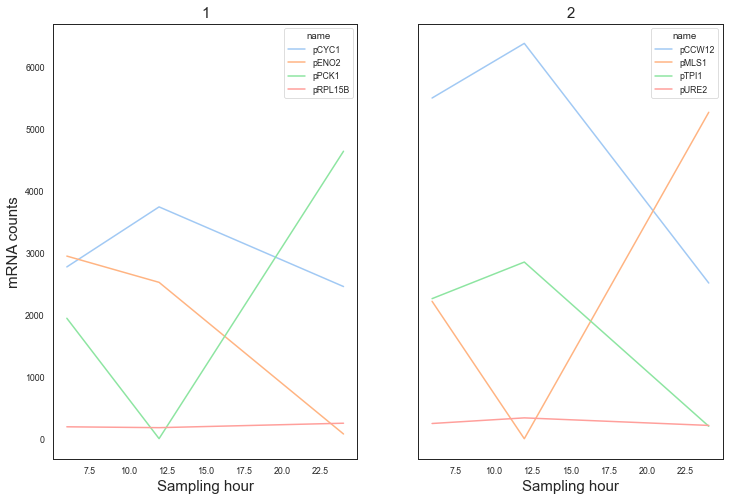

In [8]:
# Plotting an empty subplot

import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()
sns.set_style("white")
sns.set_palette("pastel")
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1.5})

# adding the data to the fig
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8), sharey=True)  # 1 row, 2 columns 

# Adding the DFs
ax1 = df_with_prom1.plot( ax=ax1)
ax2 = df_with_prom2.plot( ax=ax2)

# Adding all the titles
ax1.set_title("1",  fontsize=15)
ax2.set_title("2",  fontsize=15)
ax1.set_ylabel("mRNA counts",  fontsize=15)
ax1.set_xlabel("Sampling hour", fontsize=15)
ax2.set_ylabel("mRNA counts",  fontsize=15)
ax2.set_xlabel("Sampling hour", fontsize=15)
ax1.get_shared_x_axes().join(ax1, ax2)
#plt.savefig('Pictures/Dynamics_of_chosen_promoters.png', dpi = 120)

## DATA wrangling

In [9]:
#1. In Emacs; Result_table_210330_tmet494_Soren.xlsx to .csv N.D. -> N.A.; N.A. -> NA.
#2. Change names to plates names e.g.Result_table_210330_tmet494_Soren.csv -> Result_table_210330_tmet494_yp48Feed-Nofeed.xlsx


In [10]:
#your_df = pd.read_csv('../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren.csv',sep=';',decimal=',')
#your_df.to_csv('../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren1.csv')

In [11]:
import pandas as pd
import glob
import os

results1 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren1.csv", sep = ',')
#results2 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210519_tmet517_Soren.csv", sep = ',')
#results_merged = pd.concat([results1, results2], ignore_index=True)
results_merged = results1
results_merged

,Unnamed: 0,data_file,sample_notes,AC Samples,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tetrahydroalstonine,Amt_ug_L_Tryptamine,Amt_ug_L_Tryptophan,Unnamed: 10,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,Amt_uM_Tryptophan
0,0,210330_TMET494_032.xms,96WP988_P1_B2,0_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,8009.517,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,49.99074398,N.A.
1,1,210330_TMET494_033.xms,96WP988_P1_B3,0_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,5817.125,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,36.30710898,N.A.
2,2,210330_TMET494_034.xms,96WP988_P1_B4,0_3_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6003.777,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,37.47208214,N.A.
3,3,210330_TMET494_035.xms,96WP988_P1_B5,1_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6635.864,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,41.41720135,N.A.
4,4,210330_TMET494_036.xms,96WP988_P1_B6,1_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,7046.096,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,43.97763076,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,210330_TMET494_237.xms,96WP989_P2_F11,17_2_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,79827.258,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,498.235289,N.A.
104,104,210330_TMET494_241.xms,96WP989_P2_G2,17_3_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,97553.734,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,608.8736363,N.A.
105,105,210330_TMET494_246.xms,96WP989_P2_G7,15_4_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,623.513,N.D.,113480.148,N.A.,NaN,N.D.,N.D.,N.D.,1.175175754,N.D.,708.2770441,N.A.
106,106,210330_TMET494_247.xms,96WP989_P2_G8,15_5_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,576.808,N.D.,122431.367,N.A.,NaN,N.D.,N.D.,N.D.,1.087147784,N.D.,764.1453439,N.A.


In [12]:
# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results_merged.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)


# replacing N.D and N.A. with NA
#df_filter = df_filter.replace('N.D.', 'NA')
#df_filter = df_filter.replace('N.A.', 'NA')


# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 3:11], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 0:1], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 2:3], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, -1:], inplace = True, axis = 1)

# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

In [13]:
#"df_filter.to_csv('../data/raw/023_LC-MS/all_results_lcms/Result_table_210330_tmet494_Lucas.csv')

In [14]:
# seperate sample notes into different plates ie. P1, P2, P3: A1, A2... 
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'plate', 'well']
df_filter_plates.iloc[108:, 2:3] = df_filter_plates.iloc[108:, 1:2]
df_filter_plates.iloc[108:, 1:2] = 'P3'

list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

In [15]:
#df_filter[['sample', 'plate', 'well']] = pd.DataFrame([df_filter_plates['sample'], df_filter_plates['plate'], df_filter_plates['well'] ])
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2
concatenated = concatenated.fillna(0.0)

#### adding media rows to the AC_sample column

In [16]:

for index, row in concatenated.iterrows():
    if row['plate'] == 'P1':
        concatenated.iloc[index, 9:10] = 'yp48' 
        
    if row['plate'] == 'P2':
        concatenated.iloc[index, 9:10] = 'yp49' 
        
    if row['plate'] == 'P3':
        concatenated.iloc[index, 9:10] = 'yp50'
    
    if row['plate'] == 'P4':
        concatenated.iloc[index, 9:10] = 'yp51'
    if row['plate'] == 'P5':
        concatenated.iloc[index, 9:10] = 'yp52'
                
    
    # Addding zero betwieen letter and well value. 
    if len(row['well']) == 2:
        listed = list(row['well'])
        with_0 = str(listed[0])+str(0)+ str(listed[1])
        concatenated.iloc[index, 10:11] = with_0
         
Processed_file = concatenated.fillna(0)
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


## Merge Plate design yp48-52 metadata into single csv file


In [17]:
# importing xls file
xls = pd.ExcelFile('../data/raw/023_LC-MS/excel_files/plateDesign_yp48-51_MIA-HA-1-17_21-100.xls')

# reading the different sheets
df1 = pd.read_excel(xls, 'MIA-HA-1-17_yp48')  # plate 48
df1["plate"] = 'yp48' 

df2 = pd.read_excel(xls, 'MIA-HA-51-80_yp49') # plate 49
df2["plate"] = 'yp49' 

df3 = pd.read_excel(xls, 'MIA-HA-21-50_yp50') # plate 50
df3["plate"] = 'yp50' 

df4 = pd.read_excel(xls, 'MIA-HA-81-100_yp51')# plate 51
df4["plate"] = 'yp51' 

df5 = pd.read_excel(xls, 'yp52-HA-71-72')     # plate 52
df5["plate"] = 'yp52' 


In [18]:
results_merged = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [19]:
results_merged

,position,Sample name,Cellular Compartment,Medium,Sample Type,Temperature (C),Timepoint (h),Cultivation Container ID/Position,Operator Name,Replicate #,Strain,genotype,plate,Cellular compartment
0,A01,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
1,A02,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
2,A03,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
3,A04,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
4,A05,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,H08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
572,H09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
573,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
574,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN


In [20]:
results_merged.to_csv('../data/processed/023_LC-MS/yp48-52_meta_LL.csv', header = True, index = False)

In [21]:
# read into a dataframe
PlateDesign = pd.read_csv('../data/processed/023_LC-MS/yp48-52_meta_LL.csv') 

In [22]:
# we take the columns that we are interested in
PlateDesign= PlateDesign[['plate','position','Strain', 'Replicate #', 'genotype', 'Medium']]
# rename them
PlateDesign.columns = ['plate', 'well', 'strain','col_no', 'genotype', 'medium']
PlateDesign

,plate,well,strain,col_no,genotype,medium
0,yp48,A01,NaN,NaN,NaN,YPD
1,yp48,A02,NaN,NaN,NaN,YPD
2,yp48,A03,NaN,NaN,NaN,YPD
3,yp48,A04,NaN,NaN,NaN,YPD
4,yp48,A05,NaN,NaN,NaN,YPD
...,...,...,...,...,...,...
571,yp52,H08,NaN,NaN,NaN,NaN
572,yp52,H09,NaN,NaN,NaN,NaN
573,yp52,H10,NaN,NaN,NaN,NaN
574,yp52,H11,NaN,NaN,NaN,NaN


In [23]:
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


In [24]:
# Merge our lcms file with the genotype/strain 
merged_inner = pd.merge(Processed_file, PlateDesign, left_on=['plate','well'], right_on = ['plate','well'])
merged_inner

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD
1,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD
3,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04,MIA-HA-2,3.0,pCYC1_pURE2,YPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11,MIA-HA-74,2.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
158,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02,MIA-HA-75,2.0,CroG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
159,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07,MIA-HA-77,1.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
160,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08,MIA-HA-77,2.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


It seems like we have some duplicates. We can easily get rid of them in the following way:

In [25]:
final_processed_data = merged_inner.drop_duplicates(ignore_index = True, subset=['data_file'])
len(final_processed_data)

108

## YP48 (Cro strains)

\*\*\* Experiment 1. Check if MIA-HA-2 - 17 strains produces MIA's with / without feeding. We suspect that the base strain MIA-HA-1 has lost GES and or TDC (outside strictosidine module). If this is the case our strains will only produce MIA when feed

Strains\
1. YP48

Media feed: 0.2 mM geraniol & 1 mM tryptamine 1. YP + 2 % glucose 2. YP + 2 % glucose + feed

Cultivation 30C, 300 rpm 1. (Wednesday 24): Inoculate precultures. Transfer 10 of YP48 g.stock to 90 media 1 (-feed). 2. (Friday 26): Inoculate maincultures. Transfer 10 of preculture to 500 media 1 and media 2 3. (Monday 8): For each media, one at a time: 1. Transfer 10 of mainculture into 140 to measure OD (in incubator while measuring) 2. Transfer 200 into new 96 well plate, 3. Add 20 uL 10 mg/L caffeine stock 4. Add X ul Std_MM_v13 standards 5. Transfer 220 onto filter in collection plate, centrifuge (2000 g x 1 min; put collection plate in -80C) 6. Measure MIAs (extracellular loganin) 4. (TBD): Khem run plate 5. (TBD): Data analysis

\*\*\*\* Analytics notes: Notes from Khem: N:D.: not detected or below quantification limits; N.A.: not analyzed; Loganin, strictosidine and tryptamine are quantifiable and others are not quantifiable. Some samples might have been not integrated because of low abundance of the peak


In [26]:
# we have to make all the values into floats in order to sort them later
final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')


/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_4456/2972764381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')


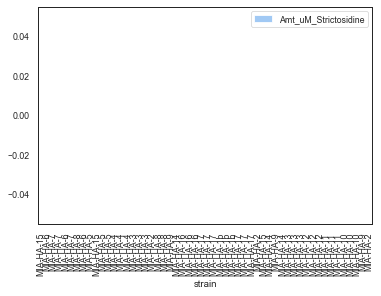

In [27]:
sorted_df = final_processed_data.sort_values(by='Amt_uM_Strictosidine', ascending=False)
yp48 = sorted_df.loc[sorted_df['plate'] == 'yp48']
yp48.plot.bar(x = 'strain', y = 'Amt_uM_Strictosidine')
None

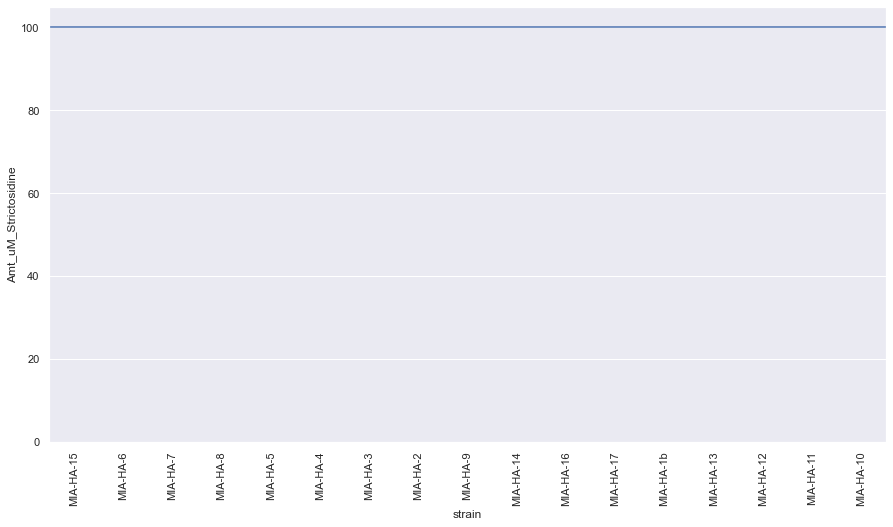

In [95]:
histogram = sns.barplot(data=yp48, x = 'strain', y = 'Amt_uM_Strictosidine')
#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
None

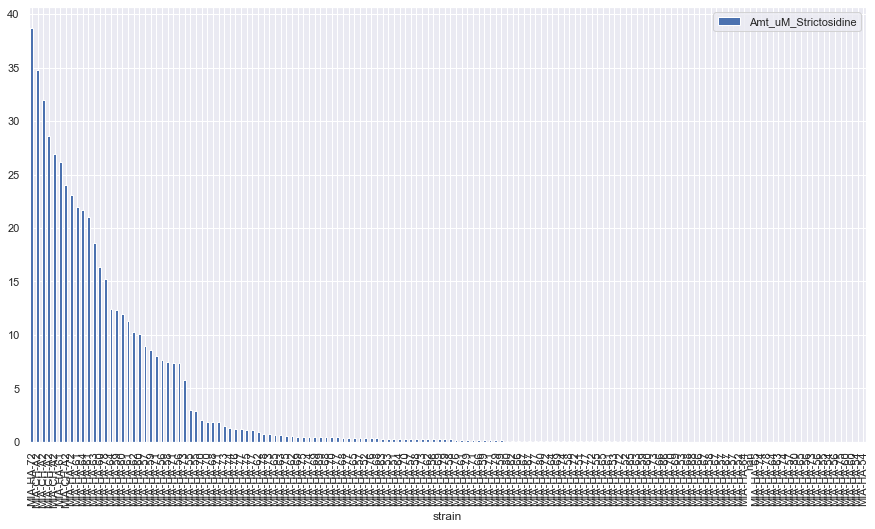

In [99]:
yp49 = sorted_df.loc[sorted_df['plate'] == 'yp49']
yp49.plot.bar(x = 'strain', y = 'Amt_uM_Strictosidine')
#yp49.head(50)
None

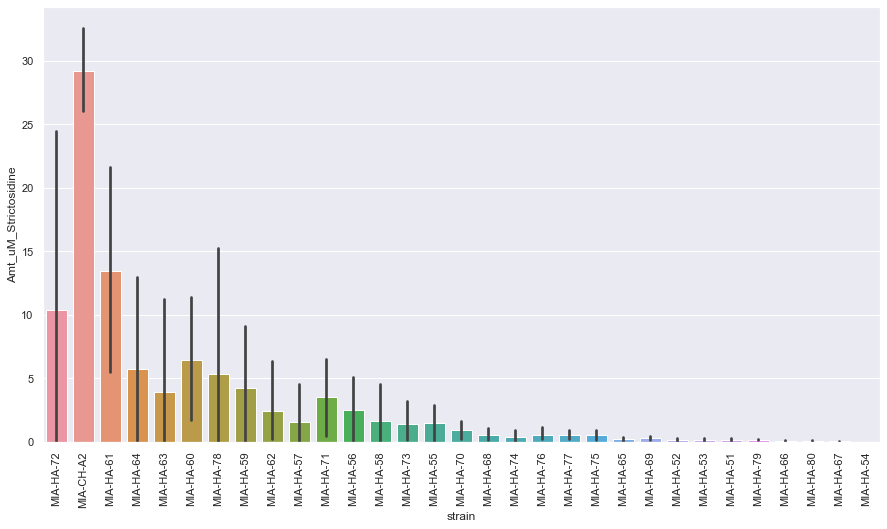

In [98]:
histogram = sns.barplot(data=yp49, x = 'strain', y = 'Amt_uM_Strictosidine')
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
None

## Conclusion 
1. Bg strain mutated & lost genes 
2. Promoters course large variation - continously low (pRPL15b) doesn't work well for G8H but does for alright for CPR (pURE) 
3. Has strain lost tryptamine synthase or geraniol synthesis genes?


Now doing the same with the other data 

## YP49-51 (library strains)

\*\*\* Experiment:

-   Strains: 3 colonies from each of 80 library plates. Each plate has specific combination of G8H and CPR but any of 16 possible promoter combinations
-   Media: YP + 2 % glucose + feed 0.2 mM geraniol & 1 mM tryptamine
-   Sampling: day 6

\*\*\*\* Analytics notes:

-   More than 500 uM tryptamine in all samples
-   No Loganic acid or Secologanin detected in any sample

**Wells not injected/acquired:**

-   Khem is not sure why.
    -   Volume is high enough.
    -   No bubbles as samples where filtered before handover (as well as spun down by Khem)
    -   Column clogging due to YPD?

Run 1

-   YP49
    -   A3, B1

Run 2

-   YP50
    -   :A9 A10, B3, B5, B9, C2, C4, C5, C9, D6
-   YP51
    -   :A3, A4, A9, A11, B7, B9, B10, C9, D3, E4

Run 3:

Rerun of samples not injected in run 2 as well as control(H7-11) for both plates rerun

-   YP50
    -   C5 and H7-11
-   YP51
    -   A11 and B9

In [29]:
# Lets read in all the plates

plate49 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210519_tmet517_Soren.csv", sep = ',')
plate50 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210603_tmet525_yp50.csv", sep = ',')
plate51 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210603_tmet525_yp51.csv", sep = ',')
rerun = pd.read_csv("../data/raw/023_LC-MS/Result_table_210608_tmet525_reyp50-51.csv", sep = ',')
plate52 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210621_tmet531_soren.csv", sep = ',')

# rerun has two columns that are controls that we dont need
rerun = rerun.iloc[2:]


# Stack the DataFrames on top of each other - Lets add the plate 49 from before
results2 = pd.concat([ plate49, plate50, plate51, rerun, plate52 ], axis=0)


 We filter for rows that has at least one of these compounds: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'

In [30]:

# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results2.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)

# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 2:8], inplace = True, axis = 1)
df_filter
# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

# split the sample notes column
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'well']
list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

# Add the to dataframes together
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2

# FIX THIS
#oncatenated.insert(loc=8, column='plate', value = 'x')

#df_filter_plates 
concatenated = concatenated.fillna(0)

In [31]:
# copying sample to plate
results_copy = concatenated.copy()
results_copy['plate'] = results_copy['sample']
results_copy

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,Amt_ug_L_Tryptophan,Amt_uM_Tryptophan,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,0.000,0.000000,96WP1056,A01,96WP1056
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,0.000,0.000000,96WP1056,A02,96WP1056
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.000000,0.0,0.056515,848.287124,0.000,0.000000,96WP1056,A04,96WP1056
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.000000,0.0,0.000000,792.719823,0.000,0.000000,96WP1056,A05,96WP1056
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.000000,0.0,0.315968,1061.010835,0.000,0.000000,96WP1056,A06,96WP1056
...,...,...,...,...,...,...,...,...,...,...,...,...
52,210621_TMET531_393.xms,96WPYP50_H10,0.0,0.532433,0.0,21.218099,428.275914,68650.109,336.141160,96WPYP50,H10,96WPYP50
53,210621_TMET531_394.xms,96WPYP50_H11,0.0,13.748222,0.0,69.678998,513.720634,55957.789,273.993972,96WPYP50,H11,96WPYP50
54,210621_TMET531_523.xms,96WPYP49_H9,0.0,1.472949,0.0,21.149234,313.123873,68621.547,336.001307,96WPYP49,H9,96WPYP49
55,210621_TMET531_524.xms,96WPYP49_H10,0.0,1.891014,0.0,28.581171,398.364162,68598.750,335.889683,96WPYP49,H10,96WPYP49


In [100]:
yp49 = yp49[['data_file','sample_notes','Amt_uM_Loganic acid',
             'Amt_uM_Loganin','Amt_uM_Secologanin','Amt_uM_Strictosidine',
             'Amt_uM_Tryptamine','sample','well','plate']]



In [103]:
results_copy

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,Amt_ug_L_Tryptophan,Amt_uM_Tryptophan,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,0.0,0.0,96WP1056,A01,yp49
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,0.0,0.0,96WP1056,A02,yp49
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,0.0,0.0,96WP1056,A04,yp49
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,0.0,0.0,96WP1056,A05,yp49
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,0.0,0.0,96WP1056,A06,yp49
...,...,...,...,...,...,...,...,...,...,...,...,...
78,210330_TMET494_193.xms,96WP989_P2_D6,0.0,0.0,0.0,0.000000,510.6537136,NaN,NaN,96WP989,D06,yp49
99,210330_TMET494_233.xms,96WP989_P2_F7,0.0,0.0,0.0,0.000000,516.0732118,NaN,NaN,96WP989,F07,yp49
102,210330_TMET494_236.xms,96WP989_P2_F10,0.0,0.0,0.0,0.000000,577.9672076,NaN,NaN,96WP989,F10,yp49
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.000000,498.235289,NaN,NaN,96WP989,F11,yp49


getting the right plate name

In [104]:
results_copy.loc[results_copy['plate'] == '96WP1056', 'plate'] = 'yp49'
results_copy.loc[results_copy['plate'] == '96WPYP50', 'plate'] = 'yp50'
results_copy.loc[results_copy['plate'] == '96WPYP51', 'plate'] = 'yp51'
results_copy.loc[results_copy['plate'] == '96WPYP52', 'plate'] = 'yp52'

# for standardization
results_copy.loc[results_copy['plate'] == '96WPYP49', 'plate'] = 'yp49'

# adding plate 49 
results_copy = pd.concat([results_copy, yp49])
results_copy

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,Amt_ug_L_Tryptophan,Amt_uM_Tryptophan,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,0.0,0.0,96WP1056,A01,yp49
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,0.0,0.0,96WP1056,A02,yp49
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,0.0,0.0,96WP1056,A04,yp49
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,0.0,0.0,96WP1056,A05,yp49
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,0.0,0.0,96WP1056,A06,yp49
...,...,...,...,...,...,...,...,...,...,...,...,...
200,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.000000,608.8736363,NaN,NaN,96WP989,G02,yp49
201,210519_TMET517_049.xms,96WP1056_C06,0.0,0.0,0.0,0.000000,1036.588166,NaN,NaN,96WP1056,C06,yp49
202,210519_TMET517_048.xms,96WP1056_C05,0.0,0.0,0.0,0.000000,968.862052,NaN,NaN,96WP1056,C05,yp49
204,210519_TMET517_029.xms,96WP1056_A12,0.0,0.0,0.0,0.000000,754.373867,NaN,NaN,96WP1056,A12,yp49


# Why do we lose so many rows here?????

In [35]:
#plate2 =PlateDesign.dropna(axis=0)
#plate2

In [36]:

#pd.set_option('display.max_rows', 1000)


In [105]:
# Merge our lcms file with the genotype/strain - THis is based on which plate it is and which well
merged_inner1 = pd.merge(results_copy, PlateDesign, on=['plate','well'])
merged_inner1

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,Amt_ug_L_Tryptophan,Amt_uM_Tryptophan,sample,well,plate,strain,col_no,genotype,medium
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,0.000,0.000000,96WP1056,A01,yp49,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
1,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,NaN,NaN,96WP1056,A01,yp49,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,0.000,0.000000,96WP1056,A02,yp49,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
3,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,NaN,NaN,96WP1056,A02,yp49,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,0.000,0.000000,96WP1056,A04,yp49,MIA-HA-52,1.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,210621_TMET531_054.xms,96WPYP52_C11,0.0,4.19698,0.0,13.087087,443.514923,62680.645,306.912036,96WPYP52,C11,yp52,MIA-CM-3,2.0,CroG8H CroCPR,t
351,210621_TMET531_055.xms,96WPYP52_C12,0.0,6.053663,0.0,18.832416,637.942897,61476.684,301.016912,96WPYP52,C12,yp52,MIA-CM-3,3.0,CroG8H CroCPR,t
352,210621_TMET531_066.xms,96WPYP52_D10,0.0,8.800625,0.0,26.620527,544.709812,62661.918,306.820340,96WPYP52,D10,yp52,MIA-CM-3,1.0,CroG8H CroCPR,g&t
353,210621_TMET531_067.xms,96WPYP52_D11,0.0,10.169043,0.0,30.014303,648.217975,60388.281,295.687612,96WPYP52,D11,yp52,MIA-CM-3,2.0,CroG8H CroCPR,g&t


Lets normalize the strictosidine productions


In [106]:
control_strict_df = merged_inner1.loc[merged_inner1['strain'] == 'MIA-CH-A2']
df_mean = control_strict_df["Amt_uM_Strictosidine"].mean()
control_strict_df

# the mean from the MIA-CH-A2 strain is ~ 32

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,Amt_ug_L_Tryptophan,Amt_uM_Tryptophan,sample,well,plate,strain,col_no,genotype,medium
284,210519_TMET517_128.xms,96WP1056_H07,0.0,5.985699,0.0,31.937737,923.984696,0.000,0.000000,96WP1056,H07,yp49,MIA-CH-A2,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
285,210519_TMET517_128.xms,96WP1056_H07,0.0,5.985699,0.0,31.937737,923.984696,NaN,NaN,96WP1056,H07,yp49,MIA-CH-A2,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
286,210519_TMET517_129.xms,96WP1056_H08,0.0,5.871533,0.0,34.732222,785.546143,0.000,0.000000,96WP1056,H08,yp49,MIA-CH-A2,2.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
287,210519_TMET517_129.xms,96WP1056_H08,0.0,5.871533,0.0,34.732222,785.546143,NaN,NaN,96WP1056,H08,yp49,MIA-CH-A2,2.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
288,210519_TMET517_130.xms,96WP1056_H09,0.0,2.170552,0.0,23.996807,604.312676,0.000,0.000000,96WP1056,H09,yp49,MIA-CH-A2,3.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
289,210519_TMET517_130.xms,96WP1056_H09,0.0,2.170552,0.0,23.996807,604.312676,NaN,NaN,96WP1056,H09,yp49,MIA-CH-A2,3.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
290,210519_TMET517_131.xms,96WP1056_H10,0.0,4.437494,0.0,26.888967,706.408276,0.000,0.000000,96WP1056,H10,yp49,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
291,210621_TMET531_524.xms,96WPYP49_H10,0.0,1.891014,0.0,28.581171,398.364162,68598.750,335.889683,96WPYP49,H10,yp49,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
292,210621_TMET531_524.xms,96WPYP49_H10,0.0,1.891014,0.0,28.581171,398.364162,NaN,NaN,96WPYP49,H10,yp49,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
293,210519_TMET517_131.xms,96WP1056_H10,0.0,4.437494,0.0,26.888967,706.408276,NaN,NaN,96WP1056,H10,yp49,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


In [107]:
norm_strict_df = merged_inner1.copy()
norm_strict_df['norm_strict_%'] = 0

In [108]:
for index, row in norm_strict_df.iterrows():
    normalized = round(((row['Amt_uM_Strictosidine']/df_mean)*100),3)
    norm_strict_df.at[index, 'norm_strict_%'] = normalized

In [109]:
# we have to make all the values into floats in order to sort them 
#merged_inner1['Amt_uM_Strictosidine'] = pd.to_numeric(merged_inner1['Amt_uM_Strictosidine'], downcast='float')
sorted_df = norm_strict_df.sort_values(by='norm_strict_%', ascending=False)
sorted_df = sorted_df.reset_index()


# Lets remove Mia-CM3 - the control
sorted_df = sorted_df[sorted_df['strain'] != 'MIA-CM-3' ]
sorted_df_lcms = sorted_df[sorted_df['strain'] != 'MIA-CH-A2' ]

sorted_df_lcms

,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,Amt_ug_L_Tryptophan,Amt_uM_Tryptophan,sample,well,plate,strain,col_no,genotype,medium,norm_strict_%
7,206,210519_TMET517_099.xms,96WP1056_F04,0.0,3.810549,0.0,38.738052,620.003695,0.0,0.0,96WP1056,F04,yp49,MIA-HA-72,1.0,CroG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,128.713
8,208,210519_TMET517_099.xms,96WP1056_F04,0.0,3.810549,0.0,38.738052,620.003695,NaN,NaN,96WP1056,F04,yp49,MIA-HA-72,1.0,CroG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,128.713
9,312,210603_TMET525_105.xms,96WPYP50_F10,0.0,4.212129,0.0,34.938195,983.416846,0.0,0.0,96WPYP50,F10,yp50,MIA-HA-44,1.0,RsepG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,116.087
22,88,210330_TMET494_181.xms,96WP989_P2_C7,0.0,4.126650955,0.0,26.206121,516.8216952,NaN,NaN,96WP989,C07,yp49,MIA-HA-61,1.0,OpumG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,87.074
23,87,210330_TMET494_181.xms,96WP989_P2_C7,0.0,4.126650955,0.0,26.206121,516.8216952,NaN,NaN,96WP989,C07,yp49,MIA-HA-61,1.0,OpumG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,87.074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,114,210519_TMET517_059.xms,96WP1056_D03,0.0,0.0,0.0,0.000000,985.210667,0.0,0.0,96WP1056,D03,yp49,MIA-HA-63,3.0,OpumG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
351,235,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.000000,498.235289,NaN,NaN,96WP989,F11,yp49,MIA-HA-74,2.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
352,117,210519_TMET517_059.xms,96WP1056_D03,0.0,0.0,0.0,0.000000,985.210667,NaN,NaN,96WP1056,D03,yp49,MIA-HA-63,3.0,OpumG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
353,233,210330_TMET494_236.xms,96WP989_P2_F10,0.0,0.0,0.0,0.000000,577.9672076,NaN,NaN,96WP989,F10,yp49,MIA-HA-74,1.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000


In [42]:
'''mean_df = sorted_df.groupby('genotype')[['Amt_uM_Strictosidine', 'norm_strict_%']].mean()
std_df = sorted_df.groupby('genotype')[['Amt_uM_Strictosidine', 'norm_strict_%']].std()
mean_df.columns = ('mean_strictosidine', 'mean_normalized_strict')
std_df.columns = ('std_strictosidine', 'std_normalized_strict')
std_mean_df = pd.merge(mean_df, std_df, left_index=True, right_index=True)
std_mean_df.reset_index(inplace=True)

std_mean_df = pd.merge(sorted_df, std_mean_df, left_index=True, right_index=True)
std_mean_df'''

"mean_df = sorted_df.groupby('genotype')[['Amt_uM_Strictosidine', 'norm_strict_%']].mean()\nstd_df = sorted_df.groupby('genotype')[['Amt_uM_Strictosidine', 'norm_strict_%']].std()\nmean_df.columns = ('mean_strictosidine', 'mean_normalized_strict')\nstd_df.columns = ('std_strictosidine', 'std_normalized_strict')\nstd_mean_df = pd.merge(mean_df, std_df, left_index=True, right_index=True)\nstd_mean_df.reset_index(inplace=True)\n\nstd_mean_df = pd.merge(sorted_df, std_mean_df, left_index=True, right_index=True)\nstd_mean_df"

In [111]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


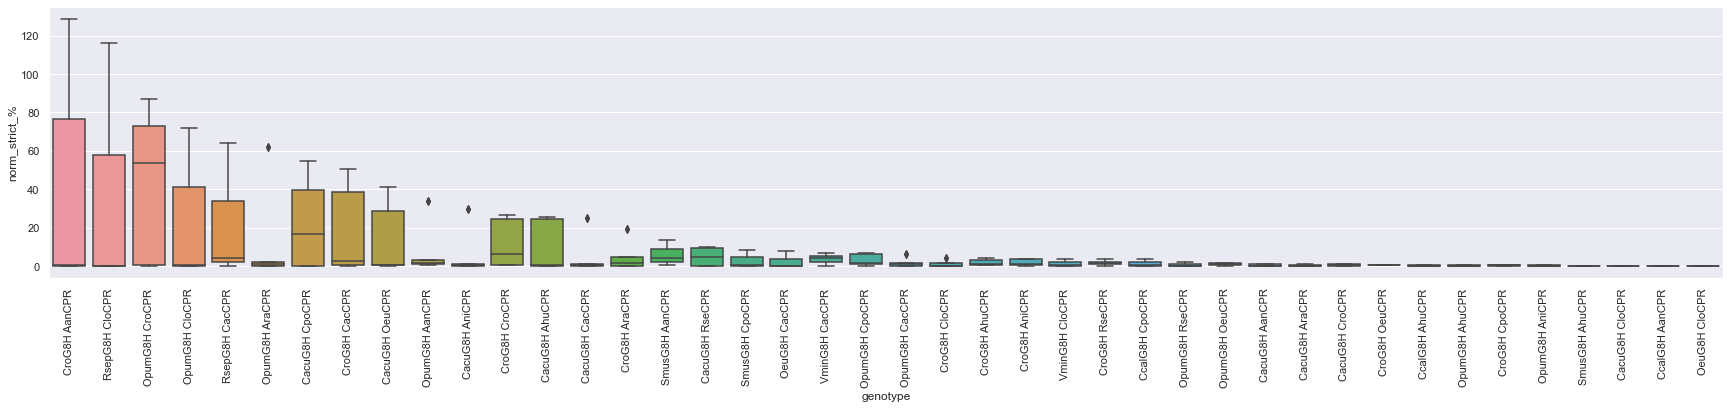

In [112]:
box_plot=sns.boxplot(x='genotype', y='norm_strict_%',data=sorted_df_lcms)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

This plot will take the same genotypes and make error bars. we are not interested in that. see below instesad. 

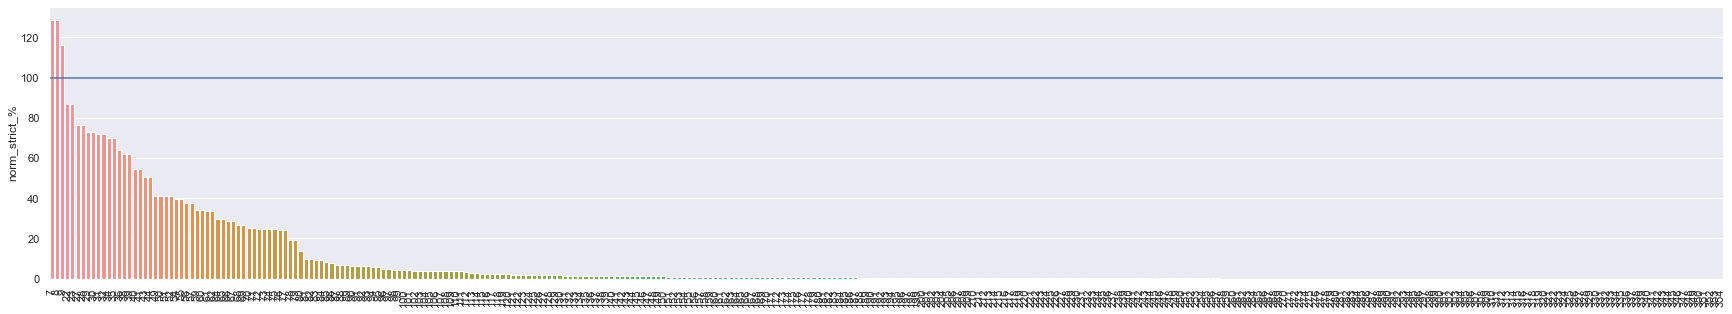

In [113]:
histogram = sns.barplot(data=sorted_df_lcms, x=sorted_df_lcms.index, y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

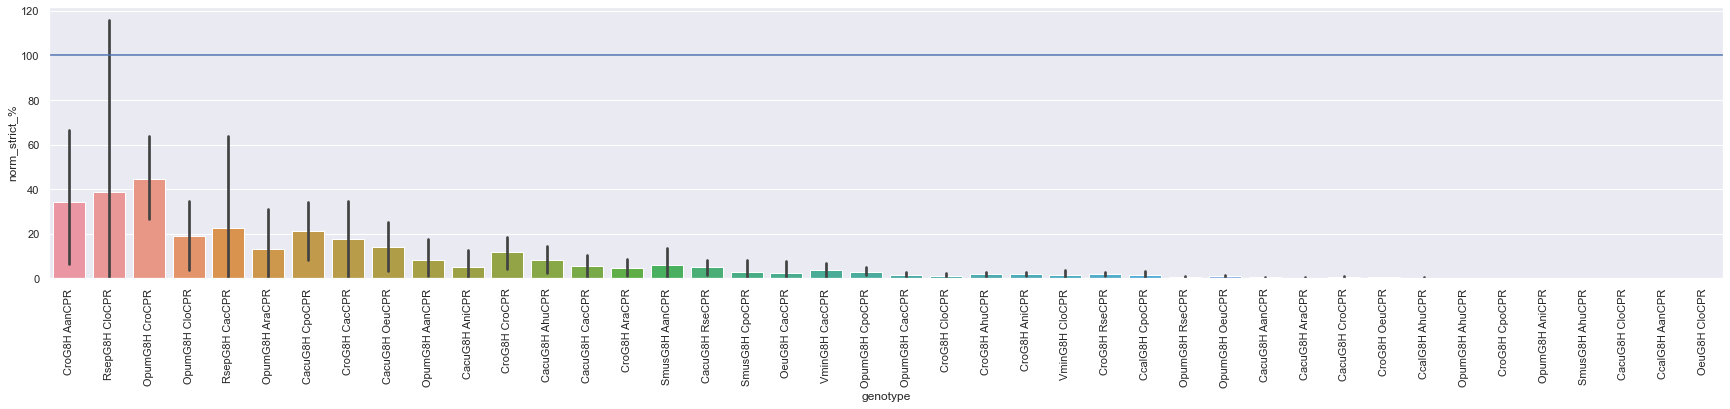

In [114]:
histogram = sns.barplot(data=sorted_df_lcms, x='genotype', y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

# Genotyping

In [115]:
path = '../data/raw/10_Sanger_results/'
files = os.listdir(path)
files

['PlateReport_yp51_cpr.xls',
 'PlateReport_yp49_cpr.xls',
 'PlateReport_yp50_cpr.xls',
 'PlateReport_yp51_g8h.xls',
 'ab1',
 'PlateReport_yp50_g8h.xls',
 'PlateReport_yp49_g8h.xls',
 '.ipynb_checkpoints',
 'sanger_fasta']

In [116]:
yp49_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp49_cpr.xls')
yp49_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp49_g8h.xls')
yp50_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp50_cpr.xls')
yp50_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp50_g8h.xls')
yp51_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp51_cpr.xls')
yp51_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp51_g8h.xls')

# list of all the dataframes
sequencing_plates = [yp49_cpr, yp49_g8h, yp50_cpr, yp50_g8h, yp51_cpr, yp51_g8h]

In [117]:
yp49_cpr.head(50)

,Plate: yp49_cpr,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,mean used length: 599 n,NaN,NaN,NaN,NaN,NaN,NaN
1,"used length < 100 n: 33 (34,74%)",NaN,NaN,NaN,NaN,NaN,NaN
2,"used length > 100 < 500 n: 4 (4,21%)",NaN,NaN,NaN,NaN,NaN,NaN
3,"used length > 500 n: 58 (61,05%)",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7,593,585
8,2,yp49_cpr_B1_pad_cpr_fw,19.63,1029,115,144,28
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6,591,584


In [119]:
def slicing_and_naming_seq_plates(sequencing_plates, where_to_slice = 7) -> list: 

    # changing column names and slicing
    for i in range(len(sequencing_plates)): 
        sequencing_plates[i].columns = ("Number", "Sample-Name", "AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used")#sequencing_plates[0].iloc[6]
        sequencing_plates[i] = sequencing_plates[i][where_to_slice:]
        
    return sequencing_plates


In [120]:
# making all values floats

def plat_seq_data_wrangler(sequencing_plates) -> list:

    list_with_dfs =[]
    
    for i in range(len(sequencing_plates)):
        # taking only a subset of the dataframe:
        numeric_values = sequencing_plates[i][["AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used"]]

        # if values are non nummeric make them NaN
        numeric_values = numeric_values.replace('n.a.', np.NaN)

        # Making them numeric
        numeric_values = numeric_values.apply(pd.to_numeric, errors='coerce')

        # Adding names column
        name_column = sequencing_plates[i]["Sample-Name"]
        number_column = sequencing_plates[i]["Number"]
        
        # Adding them to the dataframe
        data1 = pd.concat([number_column, name_column,numeric_values], axis = 1)
        list_with_dfs.append(data1)

    return list_with_dfs

In [121]:
sliced_plates = slicing_and_naming_seq_plates(sequencing_plates)

In [122]:
list_of_dfs = plat_seq_data_wrangler(sliced_plates)
list_of_dfs[1]

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,1,yp49_g8h_A1_pad_g8h_fw,55.64,1205,11.0,1002.0,990
8,2,yp49_g8h_B1_pad_g8h_fw,55.84,705,14.0,705.0,690
9,3,yp49_g8h_C1_pad_g8h_fw,55.93,1212,9.0,950.0,940
10,4,yp49_g8h_D1_pad_g8h_fw,43.19,1293,612.0,1109.0,496
11,5,yp49_g8h_E1_pad_g8h_fw,54.74,1091,20.0,370.0,349
...,...,...,...,...,...,...,...
97,91,yp49_g8h_C12_pad_g8h_fw,56.23,1241,11.0,1089.0,1077
98,92,yp49_g8h_D12_pad_g8h_fw,55.93,1236,12.0,1116.0,1103
99,93,yp49_g8h_E12_pad_g8h_fw,58.13,1221,16.0,962.0,945
100,94,yp49_g8h_F12_pad_g8h_fw,56.64,986,21.0,372.0,350


In [123]:
def plate_AvgQual(list_of_dfs_numeric, Avg_qual = 50, used_bases = 25 ) -> list:
    
    # Initialize
    filtered_plates = []

    for i in range(len(list_of_dfs_numeric)):
        # Filter 
        filter_Avg_qual = list_of_dfs_numeric[i][list_of_dfs_numeric[i]["AvgQual"] > Avg_qual ]
        filer_used_bases = filter_Avg_qual[filter_Avg_qual["used"] > used_bases ]
        # Save the filtered plates
        filtered_plates.append(filer_used_bases)
    
    return filtered_plates

In [124]:
FILTER = plate_AvgQual(list_of_dfs)
FILTER[1].head(20)

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,1,yp49_g8h_A1_pad_g8h_fw,55.64,1205,11.0,1002.0,990
8,2,yp49_g8h_B1_pad_g8h_fw,55.84,705,14.0,705.0,690
9,3,yp49_g8h_C1_pad_g8h_fw,55.93,1212,9.0,950.0,940
11,5,yp49_g8h_E1_pad_g8h_fw,54.74,1091,20.0,370.0,349
12,6,yp49_g8h_F1_pad_g8h_fw,55.13,1244,13.0,963.0,949
13,7,yp49_g8h_G1_pad_g8h_fw,56.46,1195,11.0,913.0,901
14,8,yp49_g8h_H1_pad_g8h_fw,57.16,1231,13.0,988.0,974
15,9,yp49_g8h_A2_pad_g8h_fw,57.86,1231,16.0,965.0,948
16,10,yp49_g8h_B2_pad_g8h_fw,56.12,1191,9.0,946.0,936
17,11,yp49_g8h_C2_pad_g8h_fw,57.34,1237,13.0,963.0,949


In [125]:
def split_df_names(df_names_column, which_column_to_split1 = 0, which_column_to_split2 = 2 ) -> list: 
    
    df_with_names_split =[]
    
    for i in range(len(df_names_column)):
        # splitting
        df_filter_plates = df_names_column[i]['Sample-Name'].str.split('_', expand=True)
        
        # selecting
        column1 = df_filter_plates[which_column_to_split1]
        column2 = df_filter_plates[which_column_to_split2]
        #column3 = df_filter_plates[3:]

        
        # concating
        concatenated = pd.concat([df_names_column[i], column1, column2], axis=1, ignore_index=False)
        
        # changing names 
        concatenated.columns = ("Number", "Sample-Name", "AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used", 'plate', 'well')
        
        # save 
        df_with_names_split.append(concatenated)
        
    return df_with_names_split

In [126]:
def concatenating_list_of_dfs(list_of_dfs:list): 
    ''' concatenating dataframes '''
    assembled_dfs = pd.concat(list_of_dfs, axis=0, ignore_index=False)
    
    return assembled_dfs

### Data wrangling of plateSeq2 excel files

In [128]:
#Slicing plate data
sliced_plates = slicing_and_naming_seq_plates(sequencing_plates)

# Making the values numeric
list_of_dfs = plat_seq_data_wrangler(sliced_plates)

#filter them on their 
filtered_plates = plate_AvgQual(list_of_dfs)

# Split names
split_df = split_df_names(filtered_plates)

# concatenating the plates
all_data_frames = concatenating_list_of_dfs(split_df)

# Changing names

merged_with_genotyping = pd.merge(sorted_df, all_data_frames, left_on=['plate','well'], right_on = ['plate','well'])

merged_with_genotyping
#all_data_frames

,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,Amt_ug_L_Tryptophan,Amt_uM_Tryptophan,...,genotype,medium,norm_strict_%,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
0,315,210603_TMET525_118.xms,96WPYP50_G10,0.0,2.917455,0.0,19.211488,916.207109,0.0,0.0,...,RsepG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,63.833,79,yp50_g8h_G10_pad_g8h_fw,56.25,1186,8.0,891.0,882
1,268,210519_TMET517_119.xms,96WP1056_G11,0.0,0.0,0.0,15.249573,754.671801,0.0,0.0,...,CroG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,50.669,87,yp49_cpr_G11_pad_cpr_fw,57.63,1181,19.0,1010.0,990
2,268,210519_TMET517_119.xms,96WP1056_G11,0.0,0.0,0.0,15.249573,754.671801,0.0,0.0,...,CroG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,50.669,87,yp49_g8h_G11_pad_g8h_fw,56.24,1014,19.0,370.0,350
3,269,210519_TMET517_119.xms,96WP1056_G11,0.0,0.0,0.0,15.249573,754.671801,NaN,NaN,...,CroG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,50.669,87,yp49_cpr_G11_pad_cpr_fw,57.63,1181,19.0,1010.0,990
4,269,210519_TMET517_119.xms,96WP1056_G11,0.0,0.0,0.0,15.249573,754.671801,NaN,NaN,...,CroG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,50.669,87,yp49_g8h_G11_pad_g8h_fw,56.24,1014,19.0,370.0,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,150,210519_TMET517_068.xms,96WP1056_D12,0.0,0.0,0.0,0.000000,619.353271,0.0,0.0,...,OpumG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000,92,yp49_g8h_D12_pad_g8h_fw,55.93,1236,12.0,1116.0,1103
147,151,210519_TMET517_068.xms,96WP1056_D12,0.0,0.0,0.0,0.000000,619.353271,NaN,NaN,...,OpumG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000,92,yp49_g8h_D12_pad_g8h_fw,55.93,1236,12.0,1116.0,1103
148,298,210603_TMET525_028.xms,96WPYP50_A11,0.0,0.0,0.0,0.000000,2064.384715,0.0,0.0,...,VminG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000,81,yp50_g8h_A11_pad_g8h_fw,55.74,1003,22.0,370.0,347
149,266,210519_TMET517_118.xms,96WP1056_G10,0.0,0.0,0.0,0.000000,715.107252,0.0,0.0,...,CroG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000,79,yp49_g8h_G10_pad_g8h_fw,57.35,1210,14.0,989.0,974


In [129]:
concating_all_plates_with_bad_reads = concatenating_list_of_dfs(sequencing_plates)
concating_all_plates_with_bad_reads = concating_all_plates_with_bad_reads.replace('n.a.', np.NaN)
concating_all_plates_with_bad_reads.head(50)

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
21,15,yp49_cpr_G2_pad_cpr_fw,18.38,443,122.0,137.0,14
22,16,yp49_cpr_H2_pad_cpr_fw,22.19,602,207.0,238.0,30
23,17,yp49_cpr_A3_pad_cpr_fw,55.07,1288,6.0,1139.0,1132
24,18,yp49_cpr_B3_pad_cpr_fw,53.56,1328,15.0,1202.0,1186
25,19,yp49_cpr_C3_pad_cpr_fw,57.35,1318,5.0,1123.0,1117
26,20,yp49_cpr_D3_pad_cpr_fw,18.05,354,217.0,235.0,17
27,21,yp49_cpr_E3_pad_cpr_fw,47.85,1116,36.0,805.0,768
28,22,yp49_cpr_F3_pad_cpr_fw,57.43,1303,20.0,1082.0,1061
29,23,yp49_cpr_G3_pad_cpr_fw,18.20,317,159.0,173.0,13
30,24,yp49_cpr_H3_pad_cpr_fw,25.61,1048,655.0,690.0,34


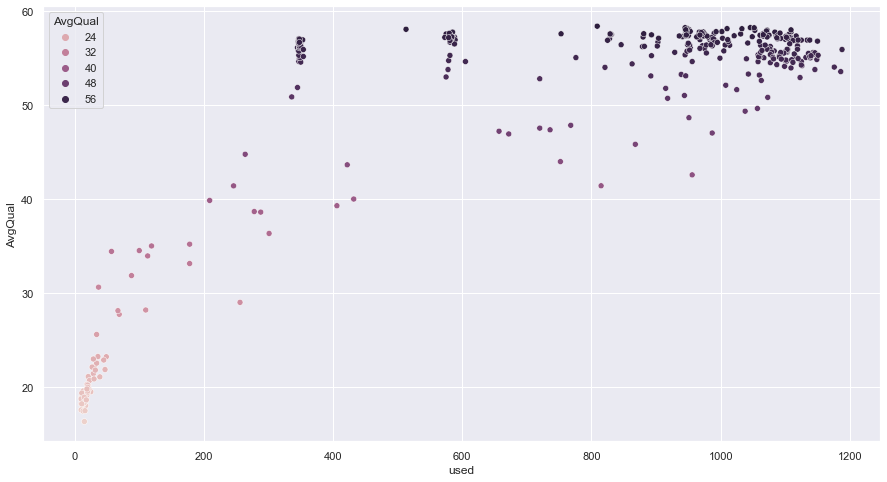

In [130]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=concating_all_plates_with_bad_reads, x="used", y="AvgQual", hue="AvgQual")
#g = sns.scatterplot(x="AvgQual", y="used", data=concating_all_plates_with_bad_reads)
None

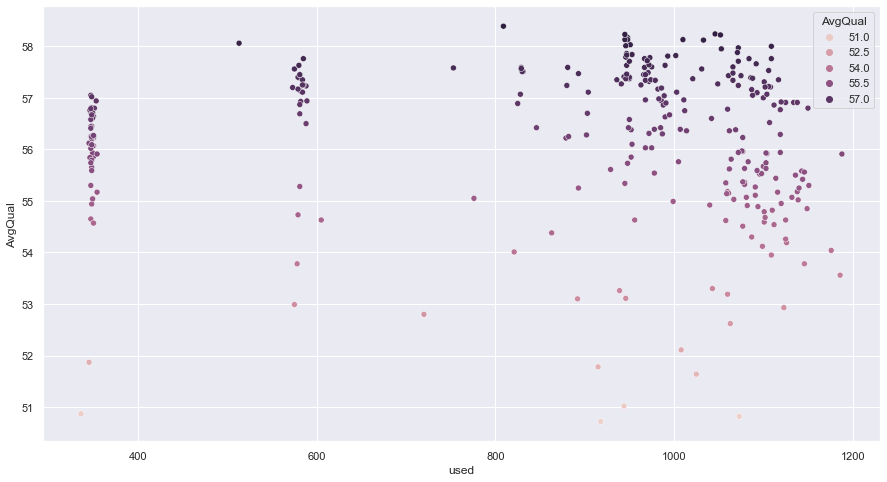

In [131]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=all_data_frames, x="used", y="AvgQual", hue="AvgQual")
#g = sns.scatterplot(x="AvgQual", y="used", data=concating_all_plates_with_bad_reads)
None

### Infering promoter to sample relationship

### sanger reports

In [62]:
'''"from Bio import SeqIO
# GEtting the objects from the gb files
"sanger_seq = []
"for seq_record in SeqIO.parse('../data/raw/10_Sanger_results/sanger_fasta/Plate_yp49_cpr.fasta', format= 'fasta'):
    "sanger_seq.append(seq_record)
"sanger_seq[0:10]'''

'"from Bio import SeqIO\n# GEtting the objects from the gb files\n"sanger_seq = []\n"for seq_record in SeqIO.parse(\'../data/raw/10_Sanger_results/sanger_fasta/Plate_yp49_cpr.fasta\', format= \'fasta\'):\n    "sanger_seq.append(seq_record)\n"sanger_seq[0:10]'

#### primers

In [132]:
from Bio import SeqIO

In [133]:
pad_pG8H_fw = SeqIO.read('../notebooks/pad_pG8H_fw.fasta', format = 'fasta')
pad_pCPR_fw = SeqIO.read('../notebooks/pad_pCPR_fw.fasta', format = 'fasta')
pad_pCPR_fw

primers_for_seq = [pad_pG8H_fw, pad_pCPR_fw]
primers_for_seq

[SeqRecord(seq=Seq('TGCCCATTCGATAAGGCA'), id='seq_mSRja9xj', name='seq_mSRja9xj', description='seq_mSRja9xj <unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('GGCGTATGGACCTGTCT'), id='seq_G6JFHeOC', name='seq_G6JFHeOC', description='seq_G6JFHeOC <unknown description>', dbxrefs=[])]

### promoter

In [134]:
pCPR = []
for seq_record in SeqIO.parse('../data/promoter_gb_files/pCPR_sites.gb', format= 'gb'):
    pCPR.append(seq_record)
    
pG8H = []
for seq_record in SeqIO.parse('../data/promoter_gb_files/pG8H_sites.gb', format= 'gb'):
    pG8H.append(seq_record)
    
    
pG8H = [site for site in pG8H]

templates = pCPR+pG8H

In [135]:
pG8H

[SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='seq_DPrPIMvy', name='pCYC1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='seq_8wWqUcpf', name='pENO2', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='seq_Bs85fGcK', name='pPCK1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('GTACTGCTGGCCATTTTTATTCAGGTTATTTGCGATTAGGTTGGGGTTTGTGTT...GCA'), id='seq_NFnLfXI8', name='pRPL15B', description='', dbxrefs=[])]

In [136]:
import sanger_sequencing

config = sanger_sequencing.Configuration()
print(config.threshold)
print(config.output)

50.0
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp9gwfgxlb


In [137]:
path = '../data/raw/10_Sanger_results/ab1'
files = os.listdir(path)


In [138]:
len(files)

499

In [139]:
reads = []
for read in files:
    if read != '.ipynb_checkpoints': 
        reads.append(SeqIO.read('../data/raw/10_Sanger_results/ab1/'+read, 'abi'))


In [140]:
print(reads[15].seq)

NNNNNNNGGGGTTCTTCGNNNNNNNANGTTTTAGTGTGTGAATGAAATAGGTGTATGTTTTCTTTTTGCTAGACAATAATTAGGAACAAGGTAAGGGAACTAAAGTGTAGAATAAGATTAAAAAAGAAGAACAAGTTGAAAAGGCAAGTTGAAATTTCAAGAAAAAAGTCAATTGAAGTACAGTAAATTGACCTGAATATATCTGAGTTCCGACAACAATGAGTTTACCAAAGAGAACAATGGAATAGGAAACTTTGAACGAAGAAAGGAAAGCAGGAAAGGAAAAAATTTTTAGGCTCGAGAACAATAGGGCGAAAAAACAGGCAACGAACGAACAATGGAAAAACGAAAAAAAAAAAAAAAANNNNNNNAAAANNNNNNNNANNNNNNNNNNNNNNAAAAAAAAANNNNNNNNNNGGNAAAAAAAANAAAAAAAAAAAAAAANNNGGGNNNNAAANNAAANNNNNNNAAAAANNNNNNNTTTTTNNNNNAANNNNAAAAANNNNNNNNNNNNNNNNNGNNNNNNNNNNCCCNNAAAANNNNNNNGGGNNAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAAANNNNNNNGGNNNAAAAAAAAANNNNTTNNCCCNNNNTTNNNNNNNNNNTNNGNNGGNNNNNNNNNNNANNGGNNAAAAANNNNNNNNCCNNNTNTTTNNGGNNNNNNNNNNNNGGGNNNNNNNCCCCCNNNNNNNNNNNNCNNNNNNNNANNNCNNNNNGGNNNNNNNNNNNNNGGGGNGGNNNNNNNNNNTTTNNNGGNNNNNNNNNNNNNNNNNNNNNNNNNNNGGNNNNNNNNNNNNNNNNNNNNNGGNNNGNNNNNNNNNCCGGNNNNNNNAAAAAANNNNNNNNNTNNNNNNTTNNNNNAAAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAA


###  New sequencing module

In [141]:
len(reads)

498

In [142]:
def build_kmers(sequence, ksize):
    kmers = []
    n_kmers = len(sequence) - ksize + 1

    for i in range(n_kmers):
        kmer = sequence[i:i + ksize]
        if 'N' in kmer: 
            continue
        else: 
            kmers.append(kmer)

    return kmers

In [143]:
kmers_1 = build_kmers(reads[50].seq, 500)
len(kmers_1)

436

In [144]:
sample_names = all_data_frames['Sample-Name'].tolist()
len(sample_names)

290

getting the hits that have a proper quality:
    

In [145]:
good_samples = []
for i in range(len(reads)):
    for j in range(len(sample_names)): 
        if reads[i].name == sample_names[j]: 
            good_samples.append(reads[i])
len(good_samples)


288

In [146]:
# main function  
def align_reads_to_template(filtered_samples, templates, length_of_kmers = 25):
    # initialize
    read_list = []
    template_list = []
    
    for i in range(len(filtered_samples)):

        # make kmers from first sample:
        kmers = build_kmers( filtered_samples[i], length_of_kmers)

        # See if we have a hit
        for j in range(len(templates)):
            
            # GO through the kmers
            for read_seq in kmers: 

                # check if we get a hit
                if str(read_seq.seq) in templates[j].seq: 
                    read_list.append(read_seq.name)
                    template_list.append(templates[j].name)

                    break
                    
    return read_list, template_list

In [147]:
# main function  
def align_reads_to_template(filtered_samples, templates, length_of_kmers = 50):
    # initialize
    read_list = []
    template_list = []
    
    for i in range(len(filtered_samples)):

        # make kmers from first sample:
        kmers = build_kmers( filtered_samples[i], length_of_kmers)

        # See if we have a hit
        for j in range(len(templates)):
            
            # GO through the kmers
            for read_seq in kmers: 

                # check if we get a hit
                if str(read_seq.seq) in templates[j].seq: 
                    read_list.append(read_seq.name)
                    template_list.append(templates[j].name)

                    break
                    
    return read_list, template_list

## infer promoter alignment

In [148]:
# Reads that have a AvgQuality over 50
reads_of_proper_quality, inf_promoters_of_proper_quality = align_reads_to_template(good_samples ,templates )
print(len(reads_of_proper_quality))

# ALL reads 
reads, inf_promoters = align_reads_to_template(reads ,templates )
print(len(reads))

285
378


In [80]:
'''# main function  ##### DONT TOUCH - works

read_list = []
template_list = []
hit = 0
for i in range(len(good_samples)):
    
    # make kmers from first sample:
    kmers = build_kmers( good_samples[i], 100)
    
    # See if we have a hit
    for j in range(len(templates)):
        for read_seq in kmers: 
            
            # check if we get a hit
            if str(read_seq.seq) in templates[j].seq: 
                hit += 1
                #print(templates[j].name , read_seq.name, hit)
                read_list.append(read_seq.name)
                template_list.append(templates[j].name)
                
                break
    
len(kmers)'''


'# main function  ##### DONT TOUCH - works\n\nread_list = []\ntemplate_list = []\nhit = 0\nfor i in range(len(good_samples)):\n    \n    # make kmers from first sample:\n    kmers = build_kmers( good_samples[i], 100)\n    \n    # See if we have a hit\n    for j in range(len(templates)):\n        for read_seq in kmers: \n            \n            # check if we get a hit\n            if str(read_seq.seq) in templates[j].seq: \n                hit += 1\n                #print(templates[j].name , read_seq.name, hit)\n                read_list.append(read_seq.name)\n                template_list.append(templates[j].name)\n                \n                break\n    \nlen(kmers)'

Making a dataframe out of the lists we got

In [150]:
df_promoters = pd.DataFrame()
df_promoters['Sample-Name']  = reads
df_promoters['inf_promoter_name'] = inf_promoters
df_promoters['inf_promoter'] = ''
df_promoters

,Sample-Name,inf_promoter_name,inf_promoter
0,yp51_cpr_C2_pad_cpr_fw,pCCW12,
1,yp49_g8h_D3_pad_g8h_fw,pPCK1,
2,yp49_g8h_E6_pad_g8h_fw,pENO2,
3,yp50_cpr_B12_pad_cpr_fw,pMLS1,
4,yp51_cpr_E6_pad_cpr_fw,pMLS1,
...,...,...,...
373,yp49_cpr_B10_pad_cpr_fw,pURE2,
374,yp49_cpr_F11_pad_cpr_fw,pMLS1,
375,yp49_cpr_A6_pad_cpr_fw,pTPI1,
376,yp50_g8h_D3_pad_g8h_fw,pENO2,


What reads failed?

In [151]:
df_promoters_good_reads = pd.DataFrame()
df_promoters_good_reads['Sample-Name']  = reads_of_proper_quality
df_promoters_good_reads['inf_promoter_name'] = inf_promoters_of_proper_quality
df_promoters_good_reads['inf_promoter'] = ''
df_promoters_good_reads

,Sample-Name,inf_promoter_name,inf_promoter
0,yp49_g8h_D3_pad_g8h_fw,pPCK1,
1,yp49_g8h_E6_pad_g8h_fw,pENO2,
2,yp50_cpr_B12_pad_cpr_fw,pMLS1,
3,yp51_cpr_E6_pad_cpr_fw,pMLS1,
4,yp49_g8h_B7_pad_g8h_fw,pCYC1,
...,...,...,...
280,yp49_cpr_B10_pad_cpr_fw,pURE2,
281,yp49_cpr_F11_pad_cpr_fw,pMLS1,
282,yp49_cpr_A6_pad_cpr_fw,pTPI1,
283,yp50_g8h_D3_pad_g8h_fw,pENO2,


In [152]:

# need this to number the column in 
list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]

for index, row in df_promoters_good_reads.iterrows():
    row['inf_promoter'] = list_of_promoters.index(row['inf_promoter_name'])+1
    
df_promoters_good_reads

,Sample-Name,inf_promoter_name,inf_promoter
0,yp49_g8h_D3_pad_g8h_fw,pPCK1,3
1,yp49_g8h_E6_pad_g8h_fw,pENO2,2
2,yp50_cpr_B12_pad_cpr_fw,pMLS1,7
3,yp51_cpr_E6_pad_cpr_fw,pMLS1,7
4,yp49_g8h_B7_pad_g8h_fw,pCYC1,1
...,...,...,...
280,yp49_cpr_B10_pad_cpr_fw,pURE2,8
281,yp49_cpr_F11_pad_cpr_fw,pMLS1,7
282,yp49_cpr_A6_pad_cpr_fw,pTPI1,6
283,yp50_g8h_D3_pad_g8h_fw,pENO2,2


### Im curious to see which sequencing results failed the quality.


We can check in following way:

In [153]:
df_diff = df_promoters[~df_promoters.apply(tuple,1).isin(df_promoters_good_reads.apply(tuple,1))]
#diff_names = df_diff['inf_promoter_name'].tolist()
df_diff

,Sample-Name,inf_promoter_name,inf_promoter
0,yp51_cpr_C2_pad_cpr_fw,pCCW12,
1,yp49_g8h_D3_pad_g8h_fw,pPCK1,
2,yp49_g8h_E6_pad_g8h_fw,pENO2,
3,yp50_cpr_B12_pad_cpr_fw,pMLS1,
4,yp51_cpr_E6_pad_cpr_fw,pMLS1,
...,...,...,...
373,yp49_cpr_B10_pad_cpr_fw,pURE2,
374,yp49_cpr_F11_pad_cpr_fw,pMLS1,
375,yp49_cpr_A6_pad_cpr_fw,pTPI1,
376,yp50_g8h_D3_pad_g8h_fw,pENO2,


conclusion: 
    It doesnt look like there are a single promoter that throughout is bad. 

In [154]:
# lets merge the quality dataframe
infered_promoters_df = pd.merge(all_data_frames, df_promoters_good_reads, left_on=['Sample-Name'], right_on = ['Sample-Name'])
infered_promoters_df

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well,inf_promoter_name,inf_promoter
0,17,yp49_cpr_A3_pad_cpr_fw,55.07,1288,6.0,1139.0,1132,yp49,A3,pURE2,8
1,18,yp49_cpr_B3_pad_cpr_fw,53.56,1328,15.0,1202.0,1186,yp49,B3,pURE2,8
2,19,yp49_cpr_C3_pad_cpr_fw,57.35,1318,5.0,1123.0,1117,yp49,C3,pTPI1,6
3,22,yp49_cpr_F3_pad_cpr_fw,57.43,1303,20.0,1082.0,1061,yp49,F3,pTPI1,6
4,26,yp49_cpr_B4_pad_cpr_fw,54.73,1128,13.0,593.0,579,yp49,B4,pCCW12,5
...,...,...,...,...,...,...,...,...,...,...,...
280,54,yp51_g8h_D11_pad_g8h_fw,54.95,1206,14.0,1135.0,1120,yp51,D11,pRPL15B,4
281,55,yp51_g8h_E11_pad_g8h_fw,57.72,1199,16.0,987.0,970,yp51,E11,pPCK1,3
282,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968,yp51,A12,pRPL15B,4
283,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947,yp51,C12,pPCK1,3


In [86]:
#all_infered_promoters_df = pd.merge(infered_promoters_df, infered_promoters_df, left_on=['plate', 'well'], right_on = ['plate', 'well'])
#all_infered_promoters_df

## Aligning promoters to reads2

In [155]:
from Bio import pairwise2
alignments = pairwise2.align.globalxx("AATATTAGATAGATGATAGATATATATATTATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG", "AATATTAGATAGATGATATATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG")

In [156]:
from Bio.pairwise2 import format_alignment
#print(format_alignment(*alignments[0].score))
alignments

[Alignment(seqA='AATATTAGATAGATGATAGATATATATATTATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG', seqB='AATATTAGAT--A-GAT-G------ATA-TATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG', score=69.0, start=0, end=80),
 Alignment(seqA='AATATTAGATAGATGATAGATATATATATTATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG', seqB='AATATTAGATA---GAT-G------ATA-TATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG', score=69.0, start=0, end=80),
 Alignment(seqA='AATATTAGATAGATGATAGATATATATATTATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG', seqB='AATATTAGATAG---AT-G------ATA-TATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG', score=69.0, start=0, end=80),
 Alignment(seqA='AATATTAGATAGATGATAGATATATATATTATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG', seqB='AATATTAGATAGA---T-G------ATA-TATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG', score=69.0, start=0, end=80),
 Alignment(seqA='AATATTAGATAGATGATAGATATATATATTATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG', seqB='AATATTAGATAGAT----

In [157]:
templates


[SeqRecord(seq=Seq('AAAGAAACTTAATACGTTATGCCGTAATGAAGGGCTACCAAAAACGATAATCTC...ATA'), id='seq_KLllyItE', name='pCCW12', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('TTTAATCTTTAGGGAGGGTAAAGTTGGATTCATCAATTTGATGAAATCCGTGTA...AAA'), id='seq_oMyQ3Qgm', name='pMLS1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AAGGATGAGCCAAGAATAAGGGAACAAGATTTTGGTAATTTCCAAAAAATCAAT...AAA'), id='seq_Au475lsO', name='pTPI1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CAAGCTGAACTCGCTGAAATTGAAAGAAAACTGGCAGAATCGTCTTCTGAAGAC...CAA'), id='seq_y4NqOW17', name='pURE2', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='seq_DPrPIMvy', name='pCYC1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='seq_8wWqUcpf', name='pENO2', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='seq_Bs85fGcK', name='pPCK1', descri

In [158]:
list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]
numbers_list = [5, 7,6, 8, 1, 2, 3, 4]

for i in range(len(templates)): 
    templates[i].description = numbers_list[i]
    
templates

[SeqRecord(seq=Seq('AAAGAAACTTAATACGTTATGCCGTAATGAAGGGCTACCAAAAACGATAATCTC...ATA'), id='seq_KLllyItE', name='pCCW12', description=5, dbxrefs=[]),
 SeqRecord(seq=Seq('TTTAATCTTTAGGGAGGGTAAAGTTGGATTCATCAATTTGATGAAATCCGTGTA...AAA'), id='seq_oMyQ3Qgm', name='pMLS1', description=7, dbxrefs=[]),
 SeqRecord(seq=Seq('AAGGATGAGCCAAGAATAAGGGAACAAGATTTTGGTAATTTCCAAAAAATCAAT...AAA'), id='seq_Au475lsO', name='pTPI1', description=6, dbxrefs=[]),
 SeqRecord(seq=Seq('CAAGCTGAACTCGCTGAAATTGAAAGAAAACTGGCAGAATCGTCTTCTGAAGAC...CAA'), id='seq_y4NqOW17', name='pURE2', description=8, dbxrefs=[]),
 SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='seq_DPrPIMvy', name='pCYC1', description=1, dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='seq_8wWqUcpf', name='pENO2', description=2, dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='seq_Bs85fGcK', name='pPCK1', description=

In [159]:
def pairwise_alignment_of_templates(reads:list, templates:list, primers:list) -> dict: 
    '''Infers relationship of templates to reads based on highest score from a pairwise alignment '''
    
    best_scores = []
    read_list = []
    template_list = []
    template_number_list = []

    for i in range(len(reads)):

        #sample = reads[i].seq
        sample = reads[i].seq.replace("N", "")
        
        # maybe add primer sequence here
        for k in range(len(primers)):
            start = sample.find(primers[k].seq)
            
            if start != -1: 
                sample[start:]
            else: 
                continue

        # Aling with templates
        score = 0
        for j in range(len(templates)): 
            template = templates[j].seq

            # Align # identical = 1, non-identical = -2 , gap = -2 , extending gap = -2
            #alignments = pairwise2.align.globalms(template, sample,2, -2, -5, -5)
            alignments = pairwise2.align.localxx(template, sample)
            
            
            
            # take the first and highest score 
            alignment_score = alignments[0].score
            
            # Get the best alignment of them all 
            if alignment_score > score: 
                score = alignment_score
                temp_name = templates[j].name
                temp_number = templates[j].description
                read_name = reads[i].name
                
                
                

        #Saving the alignmets and their names
        #if read_name not in read_list: 
        best_scores.append(score)
        read_list.append(read_name)
        template_list.append(temp_name)
        template_number_list.append(temp_number)

    # Making a pandas. dataframe
    df_promoters = pd.DataFrame()
    df_promoters['Sample-Name']  = read_list
    df_promoters['inf_promoter_name'] = template_list
    df_promoters['align_score'] = best_scores
    df_promoters['inf_promoter'] = template_number_list
  
    
    return df_promoters
        

In [160]:
%%time
df_alignment = pairwise_alignment_of_templates(good_samples,templates, primers_for_seq )
df_alignment

CPU times: user 10min 55s, sys: 1.15 s, total: 10min 56s
Wall time: 10min 56s


,Sample-Name,inf_promoter_name,align_score,inf_promoter
0,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3
1,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2
2,yp50_cpr_B12_pad_cpr_fw,pMLS1,964.0,7
3,yp51_cpr_E6_pad_cpr_fw,pMLS1,973.0,7
4,yp49_g8h_B7_pad_g8h_fw,pCYC1,509.0,1
...,...,...,...,...
283,yp49_cpr_B10_pad_cpr_fw,pURE2,975.0,8
284,yp49_cpr_F11_pad_cpr_fw,pMLS1,968.0,7
285,yp49_cpr_A6_pad_cpr_fw,pTPI1,968.0,6
286,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2


In [163]:
df_alignment

,Sample-Name,inf_promoter_name,align_score,inf_promoter
0,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3
1,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2
2,yp50_cpr_B12_pad_cpr_fw,pMLS1,964.0,7
3,yp51_cpr_E6_pad_cpr_fw,pMLS1,973.0,7
4,yp49_g8h_B7_pad_g8h_fw,pCYC1,509.0,1
...,...,...,...,...
283,yp49_cpr_B10_pad_cpr_fw,pURE2,975.0,8
284,yp49_cpr_F11_pad_cpr_fw,pMLS1,968.0,7
285,yp49_cpr_A6_pad_cpr_fw,pTPI1,968.0,6
286,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2


In [166]:
df_alignment['position'] = ''
position = []
for index, row in df_alignment.iterrows():
    split = str(row['Sample-Name'].split("_")[1])
    if split == 'g8h': 
        position.append(1)
    if split == 'cpr': 
        position.append(2)

df_alignment['position'] = position
    

grouping the positions

In [168]:
grouped = df_alignment.groupby(df_alignment.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

g8h_df

,Sample-Name,inf_promoter_name,align_score,inf_promoter,position
0,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3,1
1,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2,1
4,yp49_g8h_B7_pad_g8h_fw,pCYC1,509.0,1,1
8,yp49_g8h_G12_pad_g8h_fw,pCYC1,518.0,1,1
9,yp50_g8h_A3_pad_g8h_fw,pRPL15B,951.0,4,1
...,...,...,...,...,...
278,yp49_g8h_A3_pad_g8h_fw,pPCK1,970.0,3,1
281,yp51_g8h_A6_pad_g8h_fw,pCYC1,503.0,1,1
282,yp50_g8h_B7_pad_g8h_fw,pPCK1,961.0,3,1
286,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2,1


In [169]:
df_alignment

,Sample-Name,inf_promoter_name,align_score,inf_promoter,position
0,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3,1
1,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2,1
2,yp50_cpr_B12_pad_cpr_fw,pMLS1,964.0,7,2
3,yp51_cpr_E6_pad_cpr_fw,pMLS1,973.0,7,2
4,yp49_g8h_B7_pad_g8h_fw,pCYC1,509.0,1,1
...,...,...,...,...,...
283,yp49_cpr_B10_pad_cpr_fw,pURE2,975.0,8,2
284,yp49_cpr_F11_pad_cpr_fw,pMLS1,968.0,7,2
285,yp49_cpr_A6_pad_cpr_fw,pTPI1,968.0,6,2
286,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2,1


In [170]:
# lets merge the quality dataframe
infered_promoters_df = pd.merge(all_data_frames, df_alignment, left_on=['Sample-Name'], right_on = ['Sample-Name'])
# Sort by two columns 
#sorted_df_promoters = infered_promoters_df.sort_values(['plate', 'well'],ascending = [True, True])
#sorted_df_promoters

In [171]:
infered_promoters_df = infered_promoters_df[["plate", "well", "inf_promoter", "position"]]
infered_promoters_df

,plate,well,inf_promoter,position
0,yp49,A3,8,2
1,yp49,B3,8,2
2,yp49,C3,6,2
3,yp49,F3,6,2
4,yp49,B4,5,2
...,...,...,...,...
283,yp51,D11,4,1
284,yp51,E11,3,1
285,yp51,A12,4,1
286,yp51,C12,3,1


In [172]:
# grouping
grouped = infered_promoters_df.groupby(infered_promoters_df.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

#filtering
g8h_df = g8h_df[["plate", "well", "inf_promoter"]]
cpr_df = cpr_df[["plate", "well", "inf_promoter"]]

# changing names
g8h_df.columns = ['plate', 'well', 'inf_promoter1']
cpr_df.columns = ['plate', 'well', 'inf_promoter2']

promoter_to_well = pd.merge(g8h_df, cpr_df, left_on=['plate','well' ], right_on = ['plate','well'])
promoter_to_well

,plate,well,inf_promoter1,inf_promoter2
0,yp49,A3,3,8
1,yp49,B3,1,8
2,yp49,C3,3,6
3,yp49,F3,1,6
4,yp49,B4,1,5
...,...,...,...,...
96,yp51,D11,4,7
97,yp51,E11,3,7
98,yp51,A12,4,7
99,yp51,C12,3,7


Sanity check - did we get the correct promoters in each well? 


In [175]:
for index, row in df_alignment.iterrows():
    if row['position'] == 1 and row['inf_promoter'] > 4:
        print('SOMTHING WRONG WITH G8H')
    if row['position'] == 2 and row['inf_promoter'] < 5:
        print('SOMTHING WRONG WITH G8H')


SOMTHING WRONG WITH G8H


## Plate reports

## Combine data


In [176]:
sorted_df_lcms

,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,Amt_ug_L_Tryptophan,Amt_uM_Tryptophan,sample,well,plate,strain,col_no,genotype,medium,norm_strict_%
7,206,210519_TMET517_099.xms,96WP1056_F04,0.0,3.810549,0.0,38.738052,620.003695,0.0,0.0,96WP1056,F04,yp49,MIA-HA-72,1.0,CroG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,128.713
8,208,210519_TMET517_099.xms,96WP1056_F04,0.0,3.810549,0.0,38.738052,620.003695,NaN,NaN,96WP1056,F04,yp49,MIA-HA-72,1.0,CroG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,128.713
9,312,210603_TMET525_105.xms,96WPYP50_F10,0.0,4.212129,0.0,34.938195,983.416846,0.0,0.0,96WPYP50,F10,yp50,MIA-HA-44,1.0,RsepG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,116.087
22,88,210330_TMET494_181.xms,96WP989_P2_C7,0.0,4.126650955,0.0,26.206121,516.8216952,NaN,NaN,96WP989,C07,yp49,MIA-HA-61,1.0,OpumG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,87.074
23,87,210330_TMET494_181.xms,96WP989_P2_C7,0.0,4.126650955,0.0,26.206121,516.8216952,NaN,NaN,96WP989,C07,yp49,MIA-HA-61,1.0,OpumG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,87.074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,114,210519_TMET517_059.xms,96WP1056_D03,0.0,0.0,0.0,0.000000,985.210667,0.0,0.0,96WP1056,D03,yp49,MIA-HA-63,3.0,OpumG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
351,235,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.000000,498.235289,NaN,NaN,96WP989,F11,yp49,MIA-HA-74,2.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
352,117,210519_TMET517_059.xms,96WP1056_D03,0.0,0.0,0.0,0.000000,985.210667,NaN,NaN,96WP1056,D03,yp49,MIA-HA-63,3.0,OpumG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
353,233,210330_TMET494_236.xms,96WP989_P2_F10,0.0,0.0,0.0,0.000000,577.9672076,NaN,NaN,96WP989,F10,yp49,MIA-HA-74,1.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000


In [177]:
promoter_genotype_relationship = pd.merge(promoter_to_well, sorted_df_lcms, on=['plate','well' ])
promoter_genotype_relationship

,plate,well,inf_promoter1,inf_promoter2,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,Amt_ug_L_Tryptophan,Amt_uM_Tryptophan,sample,strain,col_no,genotype,medium,norm_strict_%
0,yp49,B10,1,8,55,210330_TMET494_171.xms,96WP989_P2_B10,0.0,0.0,0.0,0.215540,546.5416677,NaN,NaN,96WP989,MIA-HA-58,1.0,CacuG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.716
1,yp49,B10,1,8,56,210330_TMET494_171.xms,96WP989_P2_B10,0.0,0.0,0.0,0.215540,546.5416677,NaN,NaN,96WP989,MIA-HA-58,1.0,CacuG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.716
2,yp49,B10,1,8,54,210519_TMET517_040.xms,96WP1056_B10,0.0,0.0,0.0,0.000000,681.355424,0.0,0.0,96WP1056,MIA-HA-58,1.0,CacuG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
3,yp49,B10,1,8,57,210519_TMET517_040.xms,96WP1056_B10,0.0,0.0,0.0,0.000000,681.355424,NaN,NaN,96WP1056,MIA-HA-58,1.0,CacuG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
4,yp49,C10,4,5,99,210330_TMET494_184.xms,96WP989_P2_C10,0.0,0.0,0.0,0.542402,527.3489202,NaN,NaN,96WP989,MIA-HA-62,1.0,OpumG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,1.802
5,yp49,C10,4,5,100,210330_TMET494_184.xms,96WP989_P2_C10,0.0,0.0,0.0,0.542402,527.3489202,NaN,NaN,96WP989,MIA-HA-62,1.0,OpumG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,1.802
6,yp49,C10,4,5,98,210519_TMET517_053.xms,96WP1056_C10,0.0,0.0,0.0,0.250470,727.252322,0.0,0.0,96WP1056,MIA-HA-62,1.0,OpumG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.832
7,yp49,C10,4,5,101,210519_TMET517_053.xms,96WP1056_C10,0.0,0.0,0.0,0.250470,727.252322,NaN,NaN,96WP1056,MIA-HA-62,1.0,OpumG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.832
8,yp49,E10,2,6,188,210519_TMET517_092.xms,96WP1056_E10,0.0,0.0,0.0,2.014253,765.539814,NaN,NaN,96WP1056,MIA-HA-70,1.0,OpumG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,6.693
9,yp49,E10,2,6,186,210519_TMET517_092.xms,96WP1056_E10,0.0,0.0,0.0,2.014253,765.539814,0.0,0.0,96WP1056,MIA-HA-70,1.0,OpumG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,6.693


In [178]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]


g8h_genotype = []
cpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in promoter_genotype_relationship.iterrows():
    g8h_geno = str(row['genotype'].split(" ")[0])
    cpr_geno = str(row['genotype'].split(" ")[1])
    
    
    g8h_pos = g8h_list_of_index.index(str(row['genotype'].split(" ")[0]))+1
    cpr_pos = cpr_list_of_index.index(str(row['genotype'].split(" ")[1]))+1

    
    g8h_genotype.append(g8h_pos)
    cpr_genotype.append(cpr_pos)
    
promoter_genotype_relationship['G8H'] = g8h_genotype
promoter_genotype_relationship['CPR'] = cpr_genotype
    
promoter_genotype_relationship

,plate,well,inf_promoter1,inf_promoter2,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,...,Amt_ug_L_Tryptophan,Amt_uM_Tryptophan,sample,strain,col_no,genotype,medium,norm_strict_%,G8H,CPR
0,yp49,B10,1,8,55,210330_TMET494_171.xms,96WP989_P2_B10,0.0,0.0,0.0,...,NaN,NaN,96WP989,MIA-HA-58,1.0,CacuG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.716,1,8
1,yp49,B10,1,8,56,210330_TMET494_171.xms,96WP989_P2_B10,0.0,0.0,0.0,...,NaN,NaN,96WP989,MIA-HA-58,1.0,CacuG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.716,1,8
2,yp49,B10,1,8,54,210519_TMET517_040.xms,96WP1056_B10,0.0,0.0,0.0,...,0.0,0.0,96WP1056,MIA-HA-58,1.0,CacuG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000,1,8
3,yp49,B10,1,8,57,210519_TMET517_040.xms,96WP1056_B10,0.0,0.0,0.0,...,NaN,NaN,96WP1056,MIA-HA-58,1.0,CacuG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000,1,8
4,yp49,C10,4,5,99,210330_TMET494_184.xms,96WP989_P2_C10,0.0,0.0,0.0,...,NaN,NaN,96WP989,MIA-HA-62,1.0,OpumG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,1.802,2,2
5,yp49,C10,4,5,100,210330_TMET494_184.xms,96WP989_P2_C10,0.0,0.0,0.0,...,NaN,NaN,96WP989,MIA-HA-62,1.0,OpumG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,1.802,2,2
6,yp49,C10,4,5,98,210519_TMET517_053.xms,96WP1056_C10,0.0,0.0,0.0,...,0.0,0.0,96WP1056,MIA-HA-62,1.0,OpumG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.832,2,2
7,yp49,C10,4,5,101,210519_TMET517_053.xms,96WP1056_C10,0.0,0.0,0.0,...,NaN,NaN,96WP1056,MIA-HA-62,1.0,OpumG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.832,2,2
8,yp49,E10,2,6,188,210519_TMET517_092.xms,96WP1056_E10,0.0,0.0,0.0,...,NaN,NaN,96WP1056,MIA-HA-70,1.0,OpumG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,6.693,2,10
9,yp49,E10,2,6,186,210519_TMET517_092.xms,96WP1056_E10,0.0,0.0,0.0,...,0.0,0.0,96WP1056,MIA-HA-70,1.0,OpumG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,6.693,2,10


make new dataframe of promoters: 


plate


In [179]:
promoter_genotype_relationship = promoter_genotype_relationship[['plate', 'well', 'G8H','inf_promoter1', 'inf_promoter2', 'CPR',  'Amt_uM_Strictosidine', 'norm_strict_%']]
promoter_genotype_relationship

,plate,well,G8H,inf_promoter1,inf_promoter2,CPR,Amt_uM_Strictosidine,norm_strict_%
0,yp49,B10,1,1,8,8,0.215540,0.716
1,yp49,B10,1,1,8,8,0.215540,0.716
2,yp49,B10,1,1,8,8,0.000000,0.000
3,yp49,B10,1,1,8,8,0.000000,0.000
4,yp49,C10,2,4,5,2,0.542402,1.802
5,yp49,C10,2,4,5,2,0.542402,1.802
6,yp49,C10,2,4,5,2,0.250470,0.832
7,yp49,C10,2,4,5,2,0.250470,0.832
8,yp49,E10,2,2,6,10,2.014253,6.693
9,yp49,E10,2,2,6,10,2.014253,6.693


In [180]:
input_for_ml = pd.read_csv('../notebooks/input_for_ml.csv')
input_for_ml.dropna()

,Line Name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_A02,1,3,8,1,0.269401
2,yp49_A04,1,3,8,2,0.202699
3,yp49_A06,1,2,6,2,1.133272
4,yp49_A07,1,1,5,3,0.981070
...,...,...,...,...,...,...
152,yp51_E07,8,1,8,9,6.795506
153,yp51_E08,8,4,5,9,0.668263
154,yp51_E09,8,1,5,9,4.225882
155,yp51_E11,8,3,7,10,0.000000
